Task 1: Clearly state the problem definition (Student’s choice).

Problem Statement: Examine how the mileage of cars affect their auction selling prices.


Task 2: Collect the data that is relevant to solve the defined problem.

- This data is collected from the cars resell company
- The car_price.csv file contains a dataset of various car-models.
- The dataset contains 558837  rows and 16 columns(details) of which 15 are year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior,seller, mmr, sellingprice, saledate
- Assuming the first column which is year is the car sold year, selling price is in MYR and odometer using kilometers.

In [57]:
import pandas as pd

data = pd.read_csv('car_prices.csv')    # import/read the csv file using pandas

Cleaning data

In [58]:
data.duplicated().sum()
# There are no duplicates in this dataset

0

In [59]:
# remove rows that contain nothing(NaN) and reset index
data.dropna(inplace=True)
data.reset_index()       # reset index for orgaized data
# 472325 rows are left

,index,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
472321,558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472322,558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472323,558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


After cleaning there are 472325 rows × 17 columns left in the dataset

a. The general information about the entire data set car_prices.csv (EDA)

In [60]:
data.head() # first 5 rows of the dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [61]:
data.tail() # last 5 rows of the dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [62]:
data.sample(5)  # random 5 rows of the dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
266813,2012,Honda,Civic,LX,Sedan,automatic,19xfb2f50ce043476,hi,34.0,20311.0,gray,gray,ahfc/honda lease trust/hvt inc. eot,11300.0,12500.0,Wed Feb 11 2015 06:35:00 GMT-0800 (PST)
458853,2012,Kia,Optima,EX,Sedan,automatic,5xxgn4a79cg052197,oh,46.0,35487.0,white,gray,hyundai motor finance,14000.0,13800.0,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
268920,2010,Ford,Ranger,XLT,SuperCab,manual,1ftlr4fe4apa20984,pa,45.0,22961.0,red,black,big tree auto brokers,16750.0,16000.0,Fri Feb 06 2015 01:15:00 GMT-0800 (PST)
378286,2007,Chevrolet,Aveo,LS,Sedan,automatic,kl1td56677b118661,fl,29.0,98037.0,red,tan,santander consumer,2400.0,2100.0,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)
120889,2013,Ford,Edge,SEL,SUV,automatic,2fmdk4jc4dbb34005,nj,4.0,20248.0,white,beige,ford motor credit company llc,24900.0,24500.0,Wed Jan 28 2015 02:00:00 GMT-0800 (PST)


Insights: 
- the data frame has 472325 rows and 16 columns
- the data frame has header column

In [63]:
data.shape  # show the rows and columns of the dataset

(472325, 16)

In [64]:
data.columns    # display all the name of the header columns 

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

Insights:
- the data frame has 472325 rows/record of cars sold and 16 columns of details about the cars
- the data frame has header column
- the data type of the header column are string/qualitative data

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [66]:
data.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

Insights:
- the data frames has 3 data types float64(4), int64(2), object(11)
    - selling price, condition and odometer data type is float
    - only the index and year are integer data type
    - others(model, make, seller,...) are ojects data type
- memory usage: 61.3+ MB are occupied by the data frame

In [67]:
data.describe()     # statistics value will be calculated only at columns contains numeric data

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Insights:

Selling Price:
- The average selling price of the cars is 13690.512058
- Most of the selling price are within the range of 9613.033738 to the mean value, which is 13690.51
- The minimum value of the selling price is 1.00
- 25% of the values are 7200.00 or less
- 50% of the values are 12200.00 or less
- 75% of the values are 18200.00 or less
- The maximum value of the selling price is 230000.00
- Mean value are 50% percentile
- Big difference between minimum and maximum value, it could be potential outliers

Odometer:
- The average odometer of the cars is 66701.732040
- Most of the car odometer are within the range of 51939.586894 to the mean value, which is 66701.73
- The minimum value of the odometer is 1.00
- 25% of the values are 28137.00 or less
- 50% of the values are 51085.00 or less
- 75% of the values are 96590.00 or less
- The maximum value of the odometer is 999999.00
- Mean value are close to 50% percentile
- Big difference between mean, minimum and maximum value it could be potential outliers

In [68]:
data.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,472325,472325,472325,472325,472325,472325,472325,472325,472325,472325,472325
unique,53,768,1494,85,2,465768,34,20,17,11923,3609
top,Ford,Altima,Base,Sedan,automatic,wp0ca2988xu629622,fl,black,black,ford motor credit company llc,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,81013,16346,48779,174647,455963,4,75243,93244,209865,17756,5004


Insights:
- There are 53 brands/make of cars sold
- Among 53 brands there are 768 of different model of cars
- There are 1494 trim and 85 body of cars sold
- There are 2 type of transmission of the cars which is auto and manual
- 6557 cars are sold repeatedly according to the column of vin

In [69]:
data.make.nunique()     # number of make/brands are there

53

In [70]:
data.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [71]:
data.make.value_counts()    # counts all the brands in each row of the dataset

make
Ford             81013
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27181
Honda            24781
Hyundai          18659
BMW              17509
Kia              15828
Chrysler         15133
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston 

Insights:
- There are 53 different brands of cars including luxury brands like Lamborghini, Tesla and Aston Martin
- There are no missing values in any columns

In [72]:
data.corr(numeric_only=True)    # correlation of the data(numeric only) will be calculated

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.334760,-0.773102,0.588614,0.578933
condition,0.334760,1.000000,-0.314205,0.276521,0.317712
odometer,-0.773102,-0.314205,1.000000,-0.582654,-0.577397
mmr,0.588614,0.276521,-0.582654,1.000000,0.983493
sellingprice,0.578933,0.317712,-0.577397,0.983493,1.000000


Insights:

- The correlation between odometer and selling price is negative meaning increase of odometer will decrease the selling price of the car
- The correlation between condition and selling price is not strong but moderate relation. Although the relation is not strong but condition will affect the selling price of the car
- The correlation between condition and odometer is negative that means increase of odometer will decrease the condition of the car

In [73]:
data.groupby('vin')['make'].count()

vin
137za84341e193591    1
19uua5640xa034760    1
19uua5640xa053244    1
19uua5641xa040227    1
19uua5641xa053415    1
                    ..
zffew59a870152438    1
zffyt53a840138209    1
zhwgu22t47la04254    1
zhwgu22t47la04447    1
zhwgu22t97la05738    1
Name: make, Length: 465768, dtype: int64

Insights:
- There are some cars that sold repeatedly as it may be second hand cars

b. Find the most expensive car with details of make, model, seller and selling price.

Ans: The most expensive car is Ford Escape, it's selling price is 230000.0 and the seller is ford-lincoln dealer program

In [74]:
expensive_cars = data.sort_values('sellingprice', ascending=False)  # sort the data by selling price and descending it
expensive_cars = expensive_cars.head(1)    # shows only the most expensive car 
expensive_cars[['make', 'model', 'seller', 'sellingprice']]

,make,model,seller,sellingprice
344905,Ford,Escape,ford-lincoln dealer program,230000.0


c. Find the number cars sold in each model of BMW


In [75]:
bmw_df = data[data['make']== 'BMW']     # find column of make that is BMW only
bmw_df    # there are 17509 cars that's BMW

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
19,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c53ed169260,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
21,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue Feb 03 2015 04:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558781,2006,BMW,3 Series,330i,Sedan,automatic,wbavb335x6ks34097,mo,25.0,113941.0,black,black,century sales & leasing inc,7000.0,9300.0,Tue Jul 07 2015 08:00:00 GMT-0700 (PDT)
558783,2003,BMW,3 Series,330i,Sedan,automatic,wbaev53413km28443,ca,37.0,124583.0,silver,—,central auto sales inc,3425.0,4500.0,Wed Jul 08 2015 09:05:00 GMT-0700 (PDT)
558808,2008,BMW,1 Series,135i,Convertible,automatic,wbaun93588vf56134,ca,33.0,96344.0,red,black,autonet trading,12500.0,13000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)


In [76]:
bmw_df.model.value_counts()

model
3 Series                 7132
5 Series                 3479
X5                       1929
7 Series                 1064
X3                        978
6 Series                  603
1 Series                  363
X1                        290
4 Series                  275
M3                        251
Z4                        247
X6                        205
5 Series Gran Turismo     164
6 Series Gran Coupe        90
M5                         86
3 Series Gran Turismo      71
M6                         64
Z3                         57
2 Series                   32
X5 M                       27
X6 M                       24
ActiveHybrid 7             13
M6 Gran Coupe              11
4 Series Gran Coupe        11
M4                          9
i8                          9
M                           7
ActiveHybrid X6             5
Z4 M                        5
X4                          5
ActiveHybrid 5              2
8 Series                    1
Name: count, dtype: int64

d. Find the total number of cars sold in 2000

Ans: There are 3427 cars sold in 2000

In [77]:
year2000 = data[data['year'] == 2000]   #found the year that is 2000 
year2000.year.count()       #count how many are there

3427

Create the visuals using Matplotlib or Bokeh

a. Choose the suitable type of chart to plot an interactive chart for the number of cars sold over year after 2000.

In [78]:
graphYear = data.groupby(['year']).size().reset_index(name='Total')
# group the cars according to the year and sum all the cars with the same year in a new column 'Total'

In [79]:
after2000 = graphYear[graphYear['year'] >= 2000].reset_index()
# cars that are sold after 2000 are left
after2000

,index,year,Total
0,10,2000,3427
1,11,2001,5140
2,12,2002,7693
3,13,2003,10368
4,14,2004,13624
5,15,2005,17169
6,16,2006,21631
7,17,2007,25378
8,18,2008,27011
9,19,2009,17959


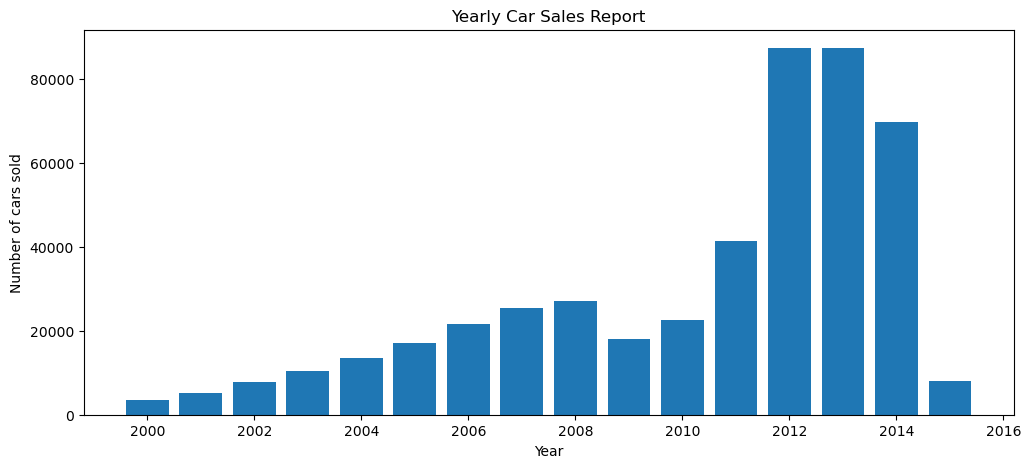

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
# magic command to enable interactive plot

fig = plt.subplots(figsize =(12, 5)) # the dimension of the plot
x = after2000.year  # x-axis is the year of the cars sold
y = after2000.Total  # y-axis is the total of the cars sold that year
plt.title("Yearly Car Sales Report") # Title
plt.xlabel("Year") # x-axis label
plt.ylabel("Number of cars sold") # y-axis label
plt.bar(x,y) # Vertical Bar Chart
plt.show()

b. Choose the suitable type of chart to plot an interactive chart for the top 10 seller to their total selling price.

In [81]:
topSeller = data.groupby('seller')['sellingprice'].sum().reset_index()      
# sum all the selling price according to the seller
topSeller = topSeller.sort_values('sellingprice',ascending=False).reset_index().head(10)        
# sort using selling price and descending it
topSeller

,index,seller,sellingprice
0,4346,ford motor credit company llc,314344025.0
1,10677,the hertz corporation,225025865.0
2,7705,nissan-infiniti lt,216864210.0
3,7675,nissan infiniti lt,202998571.0
4,1239,avis corporation,185486480.0
5,4090,financial services remarketing (lease),140256800.0
6,7019,mercedes-benz financial services,119301750.0
7,9783,santander consumer,113919490.0
8,3785,enterprise veh exchange/rental,105028436.0
9,10564,tdaf remarketing,98760775.0


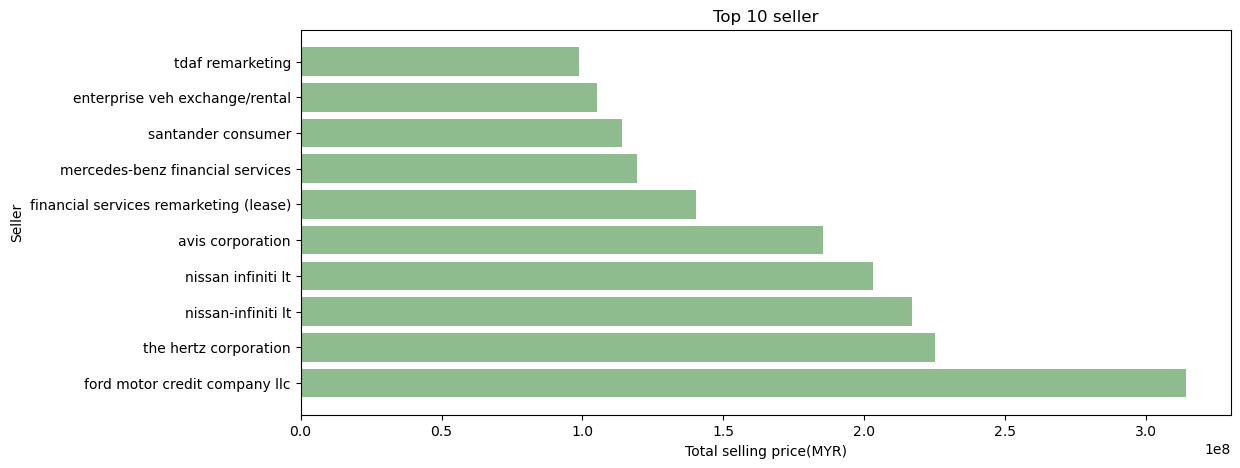

In [82]:
fig = plt.subplots(figsize =(12, 5)) # Change the dimension of the plot
x = topSeller.seller   # x-axis is the seller or company name
y = topSeller.sellingprice   # y-axis is the total sales of the seller or company
plt.title("Top 10 seller") # Title
plt.xlabel("Total selling price(MYR)") # x-axis label
plt.ylabel("Seller") # y-axis label
plt.barh(x,y, color='DarkSeaGreen') # Vertical Bar Chart
plt.show()

Additional for odometer 

In [83]:
addition = data.groupby(['odometer', 'sellingprice']).size().reset_index(name='Total')
# group cars that are same odometer and selling price
addition

,odometer,sellingprice,Total
0,1.0,1.0,1
1,1.0,150.0,2
2,1.0,200.0,11
3,1.0,225.0,7
4,1.0,250.0,11
...,...,...,...
467041,999999.0,4000.0,1
467042,999999.0,4200.0,1
467043,999999.0,5500.0,1
467044,999999.0,6000.0,1


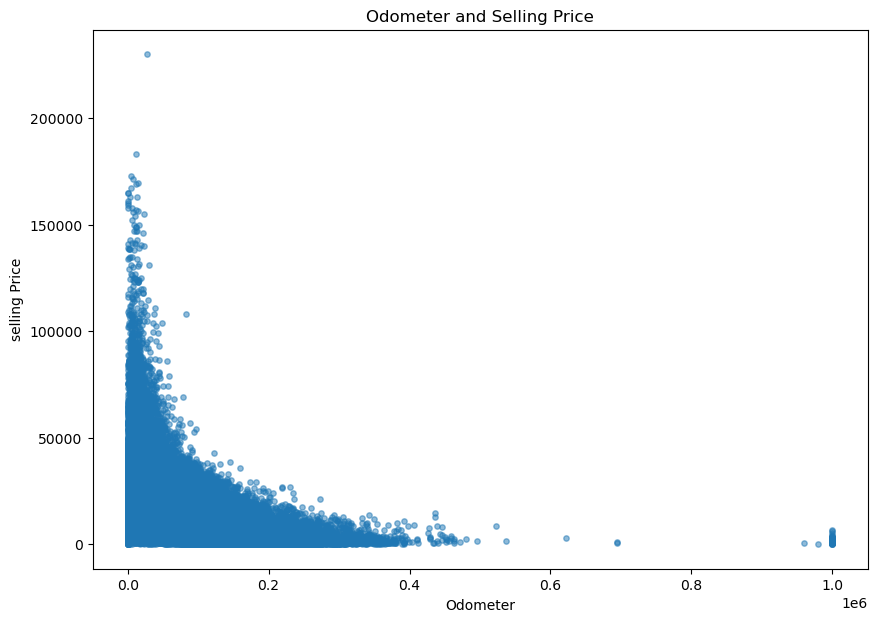

In [84]:
fig = plt.subplots(figsize =(10, 7)) 
x = addition.odometer     # x-axis is the mileage/odometer of the cars
y = addition.sellingprice  # y-axis is the selling price of the cars according mileage
plt.title("Odometer and Selling Price") 
plt.xlabel("Odometer") 
plt.ylabel("selling Price") 
plt.scatter(x, y, alpha=0.5, s=15)   # alpha setting the transparency of the points and s is for the size of points
# meaning if the density of the colour increase there are more cars sold
plt.show()

This graph is plotted using the car with the same odometer and selling price collected from the data. Notice that there’s a huge dense group of dots near the left side of the graph. These represent cars with low mileage. Cars with lower odometer readings tend to have higher selling prices. People are willing to pay more for cars that haven’t been driven much. Although there are many cars with low mileage but selling with low prices. These could be affected by other factor such as the brand, body and condition of the car. As we move to the right, almost all the dots are less than 50000 of selling price. This means that cars with more miles driven sold in a lower price which lower than 50000. We could also observe that not many cars with high odometer is sold as moving to the right side of the graph the dot become less dense. In conclusion, as the odometer reading increases, the selling price tends to decrease as the life span of the car become shorter.